In [4]:
! pip install pycaret streamlit pandas
import numpy as np
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.0 MB/s

In [17]:
import pycaret.classification as pc
from pycaret.classification import setup
import pandas as pd
import sqlite3
import json
data_type = input("Enter the type of Data (Csv, Excel, Sql, Json): ").lower()

if data_type == 'csv':
    data_path = input("Enter the path to your CSV dataset: ")
    data = pd.read_csv(data_path)
elif data_type == 'excel':
    data_path = input("Enter the path to your Excel dataset: ")
    data = pd.read_excel(data_path)
elif data_type == 'sql':
    db_path = input("Enter the path to your SQLite database: ")
    conn = sqlite3.connect(db_path)
    query = input("Enter your SQL query to fetch the data: ")
    data = pd.read_sql_query(query, conn)
    conn.close()
elif data_type == 'json':
    dataset_path = input("Enter the path to your JSON dataset: ")
    with open(dataset_path, 'r') as json_file:
        json_data = json.load(json_file)
        data = pd.DataFrame(json_data)
else:
    print("Unsupported data type. Please provide CSV, Excel, SQL, or JSON.")
    exit()


Enter the type of Data (Csv, Excel, Sql, Json): csv
Enter the path to your CSV dataset: heart.csv


In [18]:
import pandas as pd

data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
def handle_missing_values(data):
    # Drop specified columns
    drop_columns = input("Enter the columns to drop (separated by space): ").split()
    data.drop(columns=drop_columns, inplace=True)

    # Iterate through remaining columns to handle missing values
    for col in data.columns:
        if data[col].dtype == 'object':
            # Handle categorical columns
            fill_method = input(f"What to do with missing values in '{col}' (most_frequent / additional_class / skip): ").strip()
            if fill_method == 'most_frequent':
                data[col].fillna(data[col].mode()[0], inplace=True)
            elif fill_method == 'additional_class':
                data[col].fillna('Missing', inplace=True)
        else:
            # Handle numeric (continuous) columns
            fill_method = input(f"What to do with missing values in '{col}' (mean / median / mode / skip): ").strip()
            if fill_method == 'mean':
                data[col].fillna(data[col].mean(), inplace=True)
            elif fill_method == 'median':
                data[col].fillna(data[col].median(), inplace=True)
            elif fill_method == 'mode':
                data[col].fillna(data[col].mode()[0], inplace=True)

    return data


In [21]:
updated_data = handle_missing_values(data)

# Print or do further processing with the updated DataFrame
print(updated_data)

Enter the columns to drop (separated by space): age sex
What to do with missing values in 'cp' (mean / median / mode / skip): skip
What to do with missing values in 'trtbps' (mean / median / mode / skip): skip
What to do with missing values in 'chol' (mean / median / mode / skip): skip
What to do with missing values in 'fbs' (mean / median / mode / skip): skip
What to do with missing values in 'restecg' (mean / median / mode / skip): skip
What to do with missing values in 'thalachh' (mean / median / mode / skip): skip
What to do with missing values in 'exng' (mean / median / mode / skip): skip
What to do with missing values in 'oldpeak' (mean / median / mode / skip): skip
What to do with missing values in 'slp' (mean / median / mode / skip): skip
What to do with missing values in 'caa' (mean / median / mode / skip): skip
What to do with missing values in 'thall' (mean / median / mode / skip): skip
What to do with missing values in 'output' (mean / median / mode / skip): skip
     cp  t

In [25]:
import pycaret.regression as pr

target_column = input("Enter the name of the target column: ")
clf = pc.setup(data, target=target_column, session_id=123, normalize=True, transformation=True)


data.dropna(inplace=True)

if data[target_column].dtype in ['int64', 'float64']:
    task="regression"
else:
    task="classification"
print(f"Detected task type: {task}")

if task=="classification":
    clf=clf = pc.setup(data, target=target_column, session_id=123, normalize=True, transformation=True)
    best_model=pc.compare_models()

elif  task=="regression":
    reg=clf = pr.setup(data, target=target_column, session_id=123, normalize=True, transformation=True)
    best_model=pr.compare_models()
else:
    print("Unsupported task type. Please check the target column data type.")
    exit()


Enter the name of the target column: cp


,Description,Value
0,Session id,123
1,Target,cp
2,Target type,Multiclass
3,Original data shape,"(303, 12)"
4,Transformed data shape,"(303, 12)"
5,Transformed train set shape,"(212, 12)"
6,Transformed test set shape,"(91, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


Detected task type: regression


,Description,Value
0,Session id,123
1,Target,cp
2,Target type,Regression
3,Original data shape,"(303, 12)"
4,Transformed data shape,"(303, 12)"
5,Transformed train set shape,"(212, 12)"
6,Transformed test set shape,"(91, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.7300,0.8158,0.8902,0.2445,0.4654,0.3755,0.0720
ridge,Ridge Regression,0.7170,0.8223,0.8930,0.2394,0.4688,0.3719,0.0470
lr,Linear Regression,0.7167,0.8230,0.8933,0.2388,0.4691,0.3718,0.5530
lar,Least Angle Regression,0.7167,0.8230,0.8933,0.2388,0.4691,0.3718,0.0460
huber,Huber Regressor,0.7187,0.8407,0.9038,0.2209,0.4753,0.3851,0.0850
knn,K Neighbors Regressor,0.7386,0.8499,0.9134,0.1919,0.4755,0.4128,0.0740
rf,Random Forest Regressor,0.7313,0.8587,0.9198,0.1887,0.4785,0.3891,0.1980
lightgbm,Light Gradient Boosting Machine,0.7709,0.8922,0.9378,0.1628,0.4907,0.4139,0.3140
ada,AdaBoost Regressor,0.8202,0.9035,0.9425,0.1543,0.5041,0.3729,0.0860
et,Extra Trees Regressor,0.7439,0.9216,0.9483,0.1370,0.4932,0.4400,0.1610


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [26]:
model=pc.create_model("lda")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.7076,0.5909,0.5990,0.5847,0.3774,0.3800
1,0.5909,0.8158,0.5909,0.5407,0.5644,0.3734,0.3774
2,0.4762,0.6471,0.4762,0.4214,0.4352,0.1779,0.1910
3,0.4286,0.6936,0.4286,0.4286,0.4286,0.1250,0.1250
4,0.7143,0.8152,0.7143,0.7262,0.6699,0.5316,0.5532
5,0.5714,0.7555,0.5714,0.6124,0.5847,0.3438,0.3486
6,0.4762,0.7150,0.4762,0.5000,0.4807,0.2274,0.2313
7,0.5714,0.6648,0.5714,0.5000,0.5143,0.2759,0.3010
8,0.3333,0.6013,0.3333,0.3107,0.3175,-0.0769,-0.0787


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
from pycaret.classification import setup, compare_models, tune_model
import pycaret.classification as pc
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

best_features = compare_models(fold=5, sort='F1')

pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif)),
    ('lr', LogisticRegression())
])

param_grid = {
    'select__k': [1, 2, 3, 4, 5],
    'lr__C': [0.001, 0.01, 0.1, 1, 10]
}

tuned_lr = tune_model(pipeline, custom_grid=param_grid)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5096,0.6985,0.5096,0.4850,0.4885,0.2586,0.2638,0.0580
ridge,Ridge Classifier,0.5189,0.0000,0.5189,0.4683,0.4839,0.2359,0.2426,0.0800
lda,Linear Discriminant Analysis,0.5049,0.6954,0.5049,0.4747,0.4837,0.2322,0.2369,0.0560
lr,Logistic Regression,0.5047,0.6950,0.5047,0.4741,0.4825,0.2274,0.2322,0.0620
lightgbm,Light Gradient Boosting Machine,0.4757,0.6559,0.4757,0.4649,0.4598,0.1863,0.1902,0.3160
svm,SVM - Linear Kernel,0.4663,0.0000,0.4663,0.4659,0.4540,0.1923,0.1970,0.0900
rf,Random Forest Classifier,0.4950,0.6717,0.4950,0.4226,0.4479,0.1727,0.1841,0.3880
gbc,Gradient Boosting Classifier,0.4575,0.6378,0.4575,0.4553,0.4443,0.1495,0.1527,0.3820
et,Extra Trees Classifier,0.4763,0.6424,0.4763,0.4260,0.4434,0.1631,0.1684,0.2120
xgboost,Extreme Gradient Boosting,0.4526,0.6370,0.4526,0.4273,0.4332,0.1474,0.1505,0.1260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.6732,0.5000,0.4091,0.4394,0.2244,0.2495
1,0.6364,0.8128,0.6364,0.5227,0.5606,0.4359,0.4847
2,0.5714,0.6772,0.5714,0.4632,0.5014,0.3127,0.3417
3,0.5238,0.7036,0.5238,0.4656,0.4779,0.2473,0.2766
4,0.6667,0.7530,0.6667,0.5159,0.5801,0.4494,0.4811
5,0.5238,0.6641,0.5238,0.5302,0.4794,0.2391,0.2929
6,0.5714,0.7054,0.5714,0.5306,0.5076,0.3415,0.4096
7,0.4762,0.5949,0.4762,0.3730,0.4173,0.1348,0.1433
8,0.4762,0.6601,0.4762,0.4921,0.4337,0.2062,0.2617


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5455,0.7079,0.5455,0.5579,0.5433,0.3125,0.3136
1,0.5909,0.7828,0.5909,0.5227,0.5537,0.3654,0.3709
2,0.4762,0.6530,0.4762,0.4968,0.4625,0.1951,0.2079
3,0.4286,0.6781,0.4286,0.4078,0.4170,0.1127,0.1131
4,0.7143,0.8088,0.7143,0.7262,0.6699,0.5316,0.5532
5,0.5714,0.7555,0.5714,0.6124,0.5847,0.3438,0.3486
6,0.4762,0.7086,0.4762,0.4841,0.4698,0.2169,0.2238
7,0.5238,0.6609,0.5238,0.4286,0.4540,0.2045,0.2246
8,0.3333,0.5989,0.3333,0.3107,0.3175,-0.0769,-0.0787


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

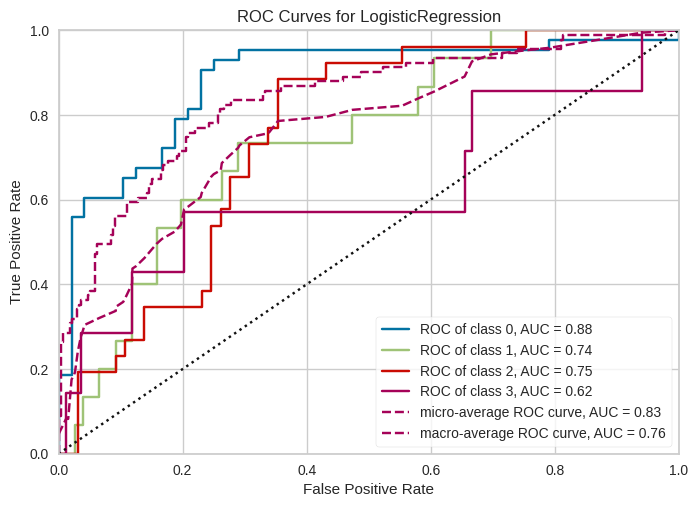

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4545,0.7324,0.4545,0.3820,0.4151,0.1484,0.1513
1,0.4091,0.6655,0.4091,0.2727,0.3273,0.0338,0.0364
2,0.6190,0.6972,0.6190,0.5119,0.5377,0.3360,0.3864
3,0.4762,0.6805,0.4762,0.4558,0.4623,0.1923,0.1944
4,0.6190,0.7841,0.6190,0.4762,0.5333,0.3412,0.3821
5,0.6190,0.7189,0.6190,0.5311,0.5694,0.3514,0.3637
6,0.3810,0.6655,0.3810,0.3333,0.3550,0.0109,0.0111
7,0.4286,0.5908,0.4286,0.3864,0.4008,0.0632,0.0653
8,0.3810,0.5700,0.3810,0.3270,0.3450,0.0319,0.0329


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

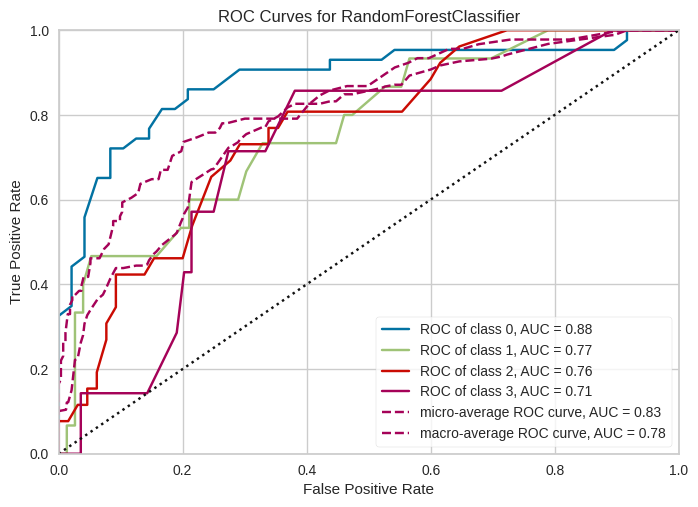

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.7199,0.5909,0.5438,0.5609,0.3812,0.3876
1,0.4091,0.6515,0.4091,0.2922,0.3409,0.0592,0.0621
2,0.5238,0.5883,0.5238,0.4816,0.4848,0.2015,0.2125
3,0.4286,0.5817,0.4286,0.4365,0.4300,0.1220,0.1233
4,0.5238,0.7234,0.5238,0.4197,0.4657,0.2075,0.2175
5,0.4286,0.6669,0.4286,0.4233,0.4232,0.0968,0.0978
6,0.3810,0.6772,0.3810,0.3524,0.3636,0.0285,0.0288
7,0.3333,0.5835,0.3333,0.2612,0.2900,-0.1094,-0.1155
8,0.4762,0.6259,0.4762,0.4857,0.4735,0.2451,0.2485


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

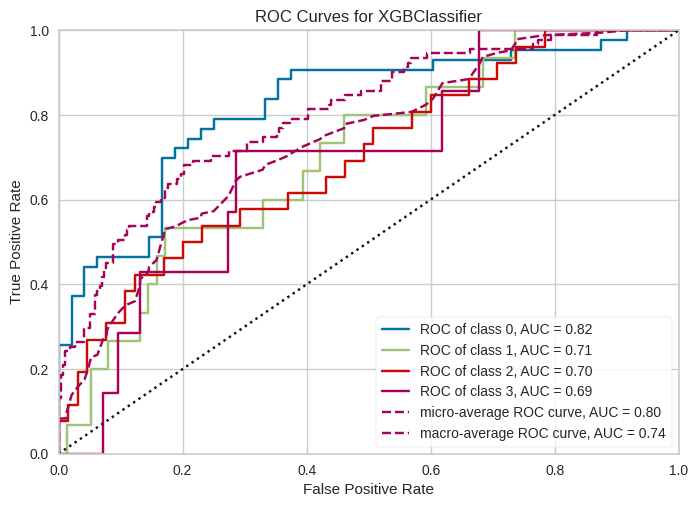

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.7461,0.5909,0.5303,0.5579,0.3654,0.3709
1,0.4091,0.7275,0.4091,0.2727,0.3273,0.0403,0.0433
2,0.5714,0.6560,0.5714,0.5311,0.5376,0.2921,0.3018
3,0.4286,0.6284,0.4286,0.4286,0.4286,0.1250,0.1250
4,0.5714,0.7838,0.5714,0.4626,0.5079,0.2759,0.2942
5,0.6190,0.7285,0.6190,0.6311,0.5972,0.3660,0.3744
6,0.4286,0.6788,0.4286,0.4097,0.4168,0.1220,0.1228
7,0.3810,0.6146,0.3810,0.3245,0.3480,-0.0037,-0.0038
8,0.3810,0.6136,0.3810,0.3270,0.3450,0.0319,0.0329


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

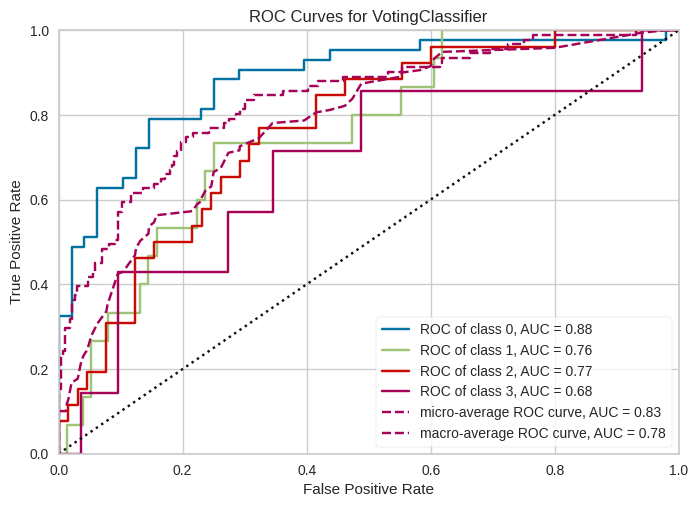

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7616,0.5000,0.4434,0.4650,0.2244,0.2302
1,0.4545,0.7046,0.4545,0.3955,0.4215,0.1592,0.1621
2,0.3810,0.5667,0.3810,0.3232,0.3483,0.0000,0.0000
3,0.5238,0.6199,0.5238,0.4762,0.4960,0.2308,0.2339
4,0.6190,0.6988,0.6190,0.5952,0.5960,0.3913,0.3977
5,0.3810,0.6233,0.3810,0.3444,0.3586,0.0109,0.0110
6,0.4286,0.6558,0.4286,0.4286,0.4286,0.1370,0.1370
7,0.4762,0.6467,0.4762,0.4622,0.4171,0.0906,0.1114
8,0.4762,0.6904,0.4762,0.4778,0.4724,0.2376,0.2393


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

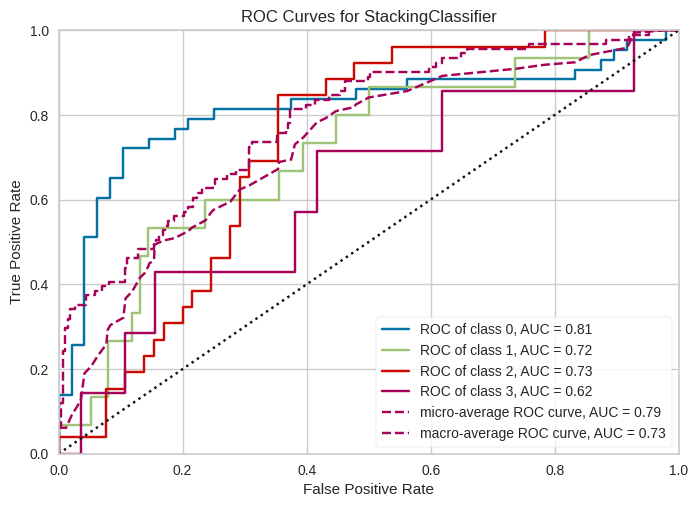

In [35]:
model1 = pc.create_model('lr')
pc.plot_model(model1)


model2 = pc.create_model('rf')
pc.plot_model(model2)

model3 = pc.create_model('xgboost')
pc.plot_model(model3)

# Blend the classification models
blended_model = pc.blend_models(estimator_list=[model1, model2, model3])
pc.plot_model(blended_model)

# Stack the classification models
stacked_model = pc.stack_models(estimator_list=[model1, model2], meta_model=model3)
pc.plot_model(stacked_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.7301,0.5909,0.5195,0.5379,0.3400,0.3576
1,0.5000,0.7340,0.5000,0.3831,0.4318,0.1933,0.2034
2,0.5238,0.6666,0.5238,0.4955,0.4984,0.2251,0.2301
3,0.4286,0.6679,0.4286,0.4286,0.4286,0.1250,0.1250
4,0.6190,0.7968,0.6190,0.4694,0.5330,0.3514,0.3830
5,0.6667,0.7596,0.6667,0.6687,0.6400,0.4389,0.4496
6,0.3810,0.6856,0.3810,0.3414,0.3600,0.0250,0.0253
7,0.4762,0.6317,0.4762,0.3912,0.4222,0.1381,0.1460
8,0.3810,0.6040,0.3810,0.3270,0.3500,0.0215,0.0219


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


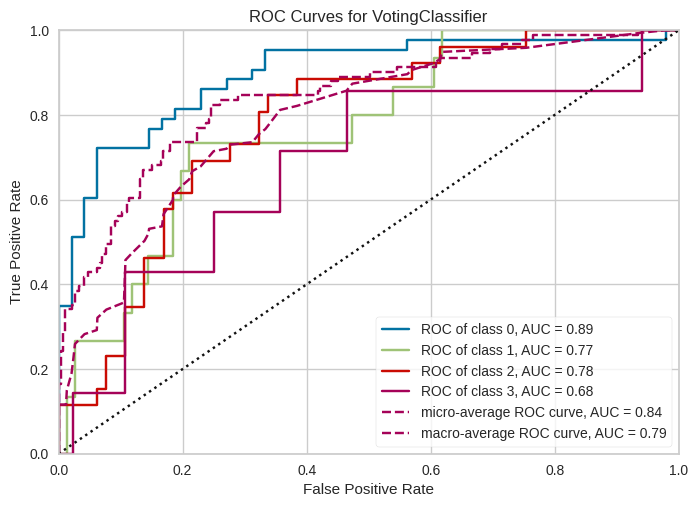

In [36]:
from pycaret.classification import tune_model, plot_model
tuned_model = tune_model(blended_model, n_iter=10)
plot_model(tuned_model)


In [37]:
from pycaret.classification import evaluate_model

evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [38]:
import streamlit as st

st.write("Hello, Streamlit!")


2023-12-27 18:43:30.975 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
